### Performing PRIM in the results of MAPs Elites

Load the dataset that for each point in the features space has the coordinates of the centroid (grid) and the fitness value.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

archivo = "archive_20000.dat"

with open(archivo, "r") as f:
    lines = f.readlines()
    data = [line.strip().split() for line in lines]
    array_data = np.array(data, dtype=float)

array_data.shape

(800, 26)

In [2]:
y= -array_data[:,0] ##Fitness value
y.shape

(800,)

## Exploratory analysis

In [3]:
X= array_data[:,1:4] #coordinates of each point in the feature space
X.shape

(800, 3)

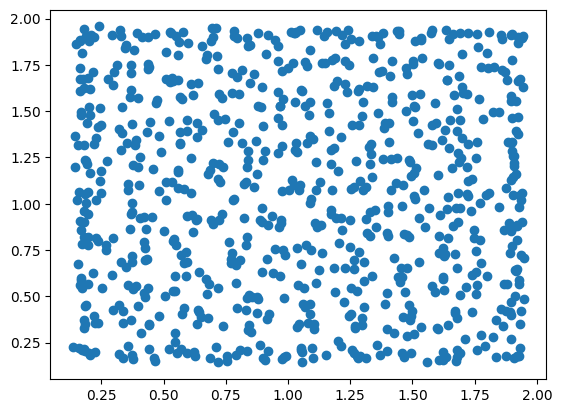

In [4]:
plt.scatter(X[:,0], X[:,1])

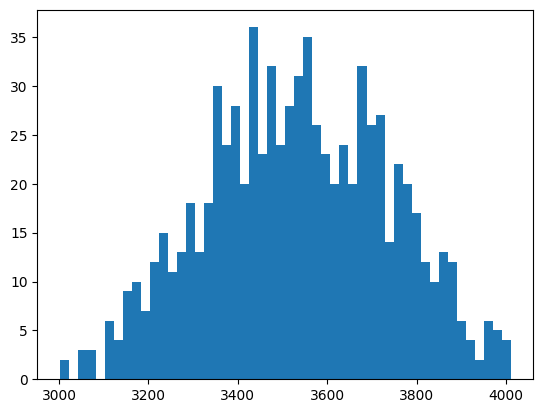

In [5]:
plt.hist(y, bins= 50)
plt.show()

In [6]:
print( "Maximum value of the fitness (number of leisure trips):", y.max())
print( "Miminum value of the fitness (number of leisure trips):", y.min())
percentil_20 = np.percentile(y, 20)
print( "Percentil 20 of the fitness (number of leisure trips):", percentil_20)

Maximum value of the fitness (number of leisure trips): 4011.0
Miminum value of the fitness (number of leisure trips): 3002.0
Percentil 20 of the fitness (number of leisure trips): 3357.0


#### Transform the output to binary variable where a vulnerable cases is defined as one with less fitness value than the 20 percentile of the whole features space

In [7]:
output = y
Y= [1 if output[i] < percentil_20 else 0 for i in range(len(output))]
Y= np.array(Y).astype(float)
print("Number of vulnerable scenarios: ", sum(Y), " where the leasure trips are less than", percentil_20, "in the whole population")

Number of vulnerable scenarios:  159.0  where the leasure trips are less than 3357.0 in the whole population


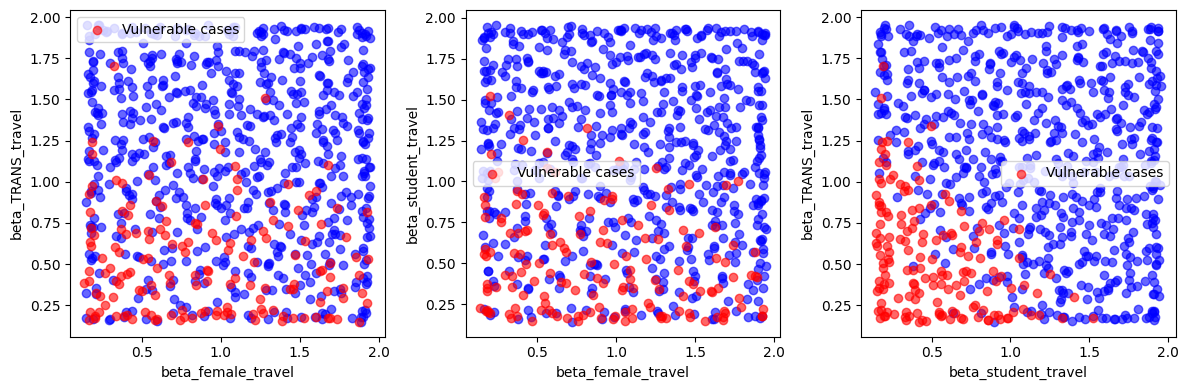

In [11]:
Y_mask= y < percentil_20
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].scatter(X[~Y_mask,0], X[~Y_mask,2], c='blue', alpha =0.6)
axes[0].scatter(X[Y_mask,0], X[Y_mask,2], c='red', label= 'Vulnerable cases', alpha =0.6)
axes[0].set_xlabel('beta_female_travel')
axes[0].set_ylabel('beta_TRANS_travel')
axes[0].legend()
axes[1].scatter(X[~Y_mask,0], X[~Y_mask,1], c='blue', alpha =0.6)
axes[1].scatter(X[Y_mask,0], X[Y_mask,1], c='red', label= 'Vulnerable cases', alpha =0.6)
axes[1].set_xlabel('beta_female_travel')
axes[1].set_ylabel('beta_student_travel')
axes[1].legend()
axes[2].scatter(X[~Y_mask,1], X[~Y_mask,2], c='blue', alpha =0.6)
axes[2].scatter(X[Y_mask,1], X[Y_mask,2], c='red', label= 'Vulnerable cases', alpha =0.6)
axes[2].set_xlabel('beta_student_travel')
axes[2].set_ylabel('beta_TRANS_travel')
axes[2].legend()

plt.tight_layout()

plt.show()

# PRIM

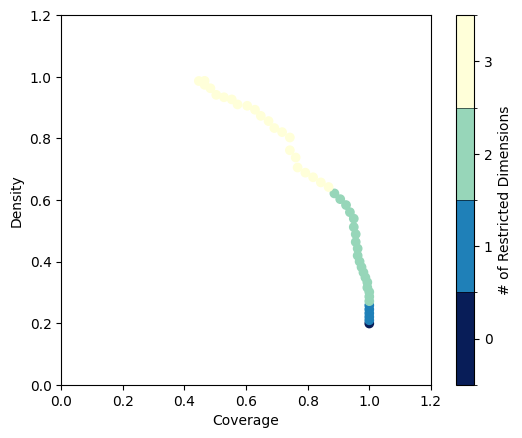

In [9]:
import prim
import pandas as pd
import matplotlib.pyplot as plt

p = prim.Prim(X, Y, threshold=0.3, threshold_type=">")

box = p.find_box()
box.show_tradeoff()

plt.show()

In [10]:
print(box)

Box 1 [Peeling Trajectory 46]
    Stats
        Coverage: 0.465409
        Density:  0.986667
        Mass:     0.093750
        Res Dim:  3.000000
        Mean:     0.986667
    Limits
                min       max     qp values
        2  0.150253  0.714219  1.792085e-22
        1  0.142885  0.917605  5.426398e-19
        0  0.135534  1.291653  1.057701e-04


In [11]:
limits = box.limits

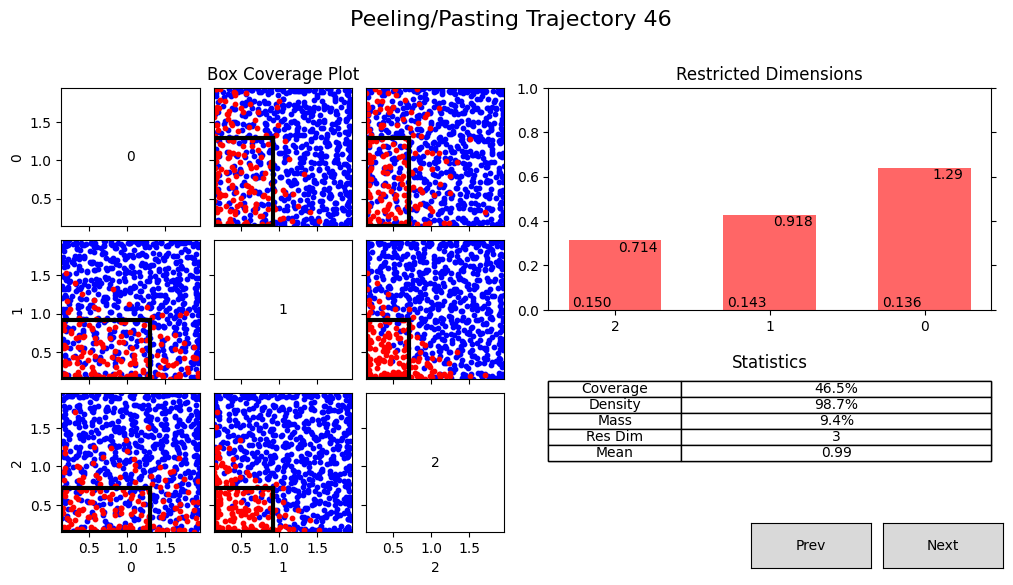

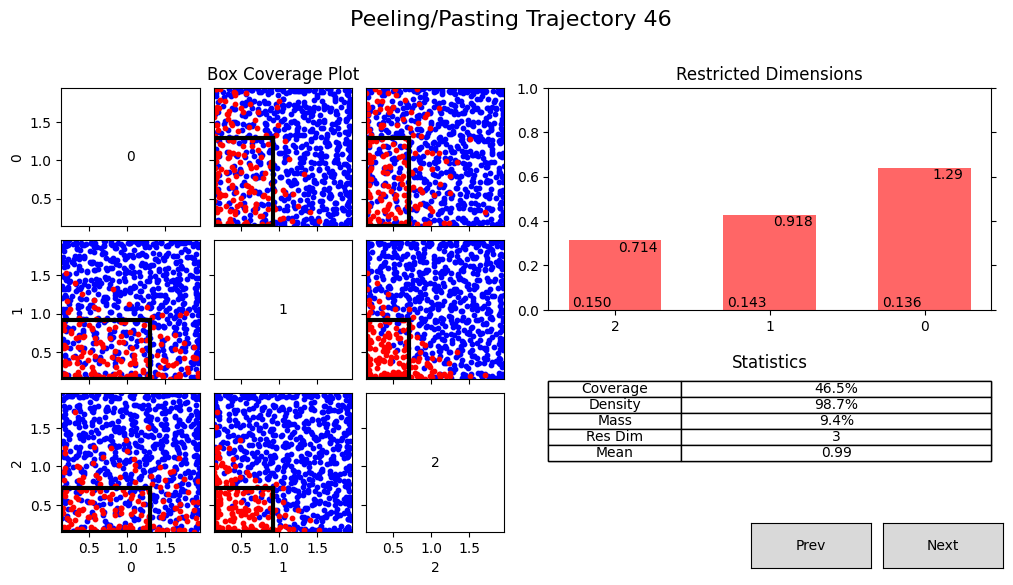

In [12]:
box.show_details()